# Please install the following python libraries
- python3: https://www.python.org/
- numpy: https://numpy.org/install/
- tqdm: https://github.com/tqdm/tqdm#installation
- matplotlib: https://matplotlib.org/stable/users/installing/index.html
- Starter Code was tested on Python 3.11.5

If you encounter the error: "IProgress not found. Please update jupyter & ipywidgets"
    
Please install the ipywidgets as follows:

    with pip, do
    - pip install ipywidgets
    
    with conda, do
    - conda install -c conda-forge ipywidgets
    
Restart your notebook 

In [1]:
import numpy as np
import random
import tqdm.notebook as tqdm
import matplotlib.pyplot as plt

In [2]:
"""Here is the implementation of the 10-armed Bandit problem/testbed. DO NOT CHANGE 
   Note that:
       - call the reset function whenever you want to generate a new 10-armed Bandit problem
"""
class Bandit(object):
    def __init__(self, k=10):
        # Number of the actions
        self.k = k

        # Numpy array to store the true action value the k arms/actions
        self.q_star = np.empty(self.k)

    def reset(self):
        # Reset the true action values to generate a new k-armed bandit problem
        # Value for each arm is randomly sampled from a normal distribution 
        # with mean = 0, variance = 1.0. 
        self.q_star = np.random.normal(loc=0, scale=1, size=self.k)
        
    def best_action(self):
        """Return the indices of all best actions/arms in a list variable
        """
        return np.where(self.q_star == self.q_star.max())[0].tolist()  

    def step(self, act):
        """
        Args:
            act (int): index of the action
        """
        # Compute the reward for each action
        # The reward for each action at time step t is sampled from a Gaussian distribution
        # For the k-th arm, the mean = q_star[k] (true value) and variance = 1
        rewards = np.random.normal(loc=self.q_star, scale=np.ones(10), size=self.k)
        return rewards[act]

In [3]:
"""Here is the plotting function you can directly use to plot the figures needed for Q5 and Q6
"""

# plot function
def plot_curves(arr_list, legend_list, color_list, upper_bound, ylabel):
    """
    Args:
        arr_list (list): list of results arrays to plot
        legend_list (list): list of legends corresponding to each result array
        color_list (list): list of color corresponding to each result array
        upper_bound (numpy array): array contains the best possible rewards for 2000 runs. the shape should be (2000,)
        ylabel (string): label of the Y axis
        
        Note that, make sure the elements in the arr_list, legend_list and color_list are associated with each other correctly. 
        Do not forget to change the ylabel for different plots.
        
        To plot the upper bound for % Optimal action figure, set upper_bound = np.ones(num_step), where num_step is the number of steps.
    """
    # set the figure type
    plt.clf()
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # PLEASE NOTE: Change the labels for different plots
    ax.set_ylabel(ylabel)
    ax.set_xlabel("Steps")
    ax.set_ylim(-0.1, upper_bound.mean() + 0.1)
    
    # ploth results
    h_list = []
    for arr, legend, color in zip(arr_list, legend_list, color_list):
        # compute the standard error
        arr_err = arr.std(axis=0) / np.sqrt(arr.shape[0])
        # plot the mean
        h, = ax.plot(range(arr.shape[1]), arr.mean(axis=0), color=color, label=legend)
        # plot the confidence band
        arr_err = 1.96 * arr_err
        ax.fill_between(range(arr.shape[1]), arr.mean(axis=0) - arr_err, arr.mean(axis=0) + arr_err, alpha=0.3, color=color)
        # save the plot handle
        h_list.append(h) 
    
    # plot the upper bound
    h = plt.axhline(y=upper_bound.mean(), color='k', linestyle='--', label="upper bound")
    h_list.append(h)
    
    # plot legends
    ax.legend(handles=h_list)  
    plt.show()

# Q5: Implement the ε-greedy algorithm with incremental update

The following is the scaffolding code for the epsilon-greedy agent. 

    1. Reset function: reset the Q value for each arm/action to be self.init. (e.g., self.init = 0)
    
    2. Choose action: select the arm/action using epsilon-greedy strategy.
    
    3. Update: update the time steps, Q values for k arms/actions and numbers of selecting each arm/action.
    
    4. argmax: find the indices of all maximal values in a numpu array.
    
Please finish the code under "CODE HERE"

In [4]:
class EpsilonGreedyAgent(object):
    def __init__(self, k: int, init: int, epsilon: float) -> None:
        """Epsilon greedy bandit agent

        Args:
            k (int): number of arms
            init (init): initial value of Q-values
            epsilon (float): random action probability
        """
        # Number of the arms. For example, k = 10 for 10-armed Bandit problem
        self.k = k

        # Initial Q value
        self.init = init

        # Epsilon value
        self.epsilon = epsilon

        # Q-values for each arm
        self.Q = None
        # Number of times each arm was pulled
        self.N = None
        # Current total number of steps
        self.t = None

    def reset(self) -> None:
        """Initialize or reset Q-values and counts

        This method should be called after __init__() at least once
        """
        self.Q = self.init * np.ones(self.k, dtype=np.float32)
        self.N = np.zeros(self.k, dtype=int)
        self.t = 0

    def choose_action(self) -> int:
        """Choose which arm to pull

        With probability 1 - epsilon, choose the best action (break ties arbitrarily, use argmax() from above).
        
        With probability epsilon, choose a random action.
        """
        # CODE HERE: please implement the epsilon-greedy strategy to select the action
        noise = np.random.rand()
        if noise < self.epsilon:
            self.action = np.random.randint(self.k) # random action
        else:
            self.action = self.argmax(self.Q) # greedy action
        return self.action
        # return int 

    def update(self, action: int, reward: float) -> None:
        """Update Q-values and N after observing reward.

        Args:
            action (int): index of pulled arm
            reward (float): reward obtained for pulling arm
        """
        # increase the time step
        self.t += 1
        
        # CODE HERE: implement the incremental update
        # update the self.N
        self.N[action] += 1
        
        # CODE HERE: update self.Q with the incremental update
        # Note: please use the sample-average technique in equation 2.1
        self.Q[action] += 1/self.N[action] * (reward - self.Q[action])


    @staticmethod
    def argmax(arr) -> int:
        """Argmax that breaks ties randomly

        Takes in a list of values and returns the index of the item with the highest value, breaking ties randomly.

        Note: np.argmax returns the first index that matches the maximum, so we define this method to use in EpsilonGreedy and UCB agents.
        Args:
            arr: sequence of values
        """
        #CODE HERE: implement argmax_a Q(a) for the greedy action selection, breaking ties randomly.
        max_val = np.max(arr)
        max_indices = np.where(arr == max_val)[0]
        if len(max_indices) > 1:
            return np.random.choice(max_indices)
        else:
            return max_indices[0]
        # return int

In [5]:
""" Here is the function to run the epsilon greedy agent. Please complete the missing part under "CODE HERE"
"""
# run epsilon greedy 
def run_epsilon_greedy_agent(run_num, time_step, epsilon=0.0, init=0.0):
    """
    Args:
        run_num (int): number of runs
        time_step (int): number of time steps per run
        epsilon (float): epsilon for the agent
        init (float): initial value for the Q. (i.e., Q1)
    """
    # DO NOT CHANGE: create the 10-armed Bandit problem
    k = 10
    env = Bandit(k)
    env.reset()

    # DO NOT CHANGE: create the agent with proper initial value and epsilon
    agent = EpsilonGreedyAgent(k=k, init=init, epsilon=epsilon)
    agent.reset()

    # DO NOT CHANGE: create a numpy array to store rewards with shape (run_num, time_step)
    # For example, results_rewards[r, t] stores the reward for step t in the r-th running trail
    results_rewards = np.empty((run_num, time_step))
    
    # DO NOT CHANGE: create a numpy array to store optimal action proportion with shape (run_num, time_step)
    # For example, results_action[r, t] stores 1 if the selected action at step t in the r-th runing trail is optimal
    # and 0 otherwise.
    results_action = np.empty((run_num, time_step))
    
    # DO NOT CHANGE: create a numpy array to save upper_bound (only for plotting rewards; it should be 1 for plotting action optimality proportion)
    # For example, upper_bound[r] stores the true action value for the r-th running trail.
    upper_bound = np.empty(run_num)
    

    # loop for trails starts
    for r in tqdm.tqdm(range(run_num), desc="run number", position=0):
        
        # CODE HERE: reset the environment to create a new 10-armed bandit problem.
        env.reset()

        # CODE HERE: reset the agent
        agent.reset()
        
        # CODE HERE: compute the upper bound for each running trial and update upper_bound[r]
        upper_bound[r] = np.max(env.q_star)
        
        # loop for each trail a fixed number of steps
        for t in tqdm.tqdm(range(time_step), desc="time step", position=1, leave=False):
            
            # CODE HERE: get the best action to execute at step t 
            # act = int
            act = agent.choose_action()
            
            # CODE HERE: interact with the environment to receive rewards
            # reward = float
            reward = env.step(act)
            
            # Code HERE: update the agent based on the observed reward
            agent.update(act, reward)
                     
            """DO NOT CHANGE BELOW"""
            # save the reward
            results_rewards[r, t] = reward
            # check and save whether the action is optimal
            if act in env.best_action():
                results_action[r, t] = 1
            else:
                results_action[r, t] = 0
            
    return results_rewards, results_action, upper_bound

In [7]:
"""Here is the implementation for running the experiment. You have to run the "run_epsilon_greedy_agent" function
   for multiple times for different parameter combination. Please use smaller run_num and time_step for Debug only.
   For example, run_num = 100, time_step = 100
"""
# always set the random seed for results reproduction
np.random.seed(1234)
random.seed(1234)
    
# set the running parameters (Use 2000 runs and 1000 steps for final report)
run_num = 200
time_step = 100
    
# CODE HERE: 
# 1. run the epsilon-greedy agent experiment for initial value = 0.0, epsilon = 0.0
R1results_rewards, R1results_action, R1upper_bound = run_epsilon_greedy_agent(run_num, time_step, epsilon=0.0, init=0.0)
# 2. run the epsilon-greedy agent experiment for initial value = 0.0, epsilon = 0.01
R2results_rewards, R2results_action, R2upper_bound = run_epsilon_greedy_agent(run_num, time_step, epsilon=0.01, init=0.0)
# 3. run the epsilon-greedy agent experiment for initial value = 0.0, epsilon = 0.1
R3results_rewards, R3results_action, R3upper_bound = run_epsilon_greedy_agent(run_num, time_step, epsilon=0.1, init=0.0)

run number:   0%|          | 0/200 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

run number:   0%|          | 0/200 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

run number:   0%|          | 0/200 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

time step:   0%|          | 0/100 [00:00<?, ?it/s]

In [8]:
print(R1results_rewards.shape)

(200, 100)


<Figure size 640x480 with 0 Axes>

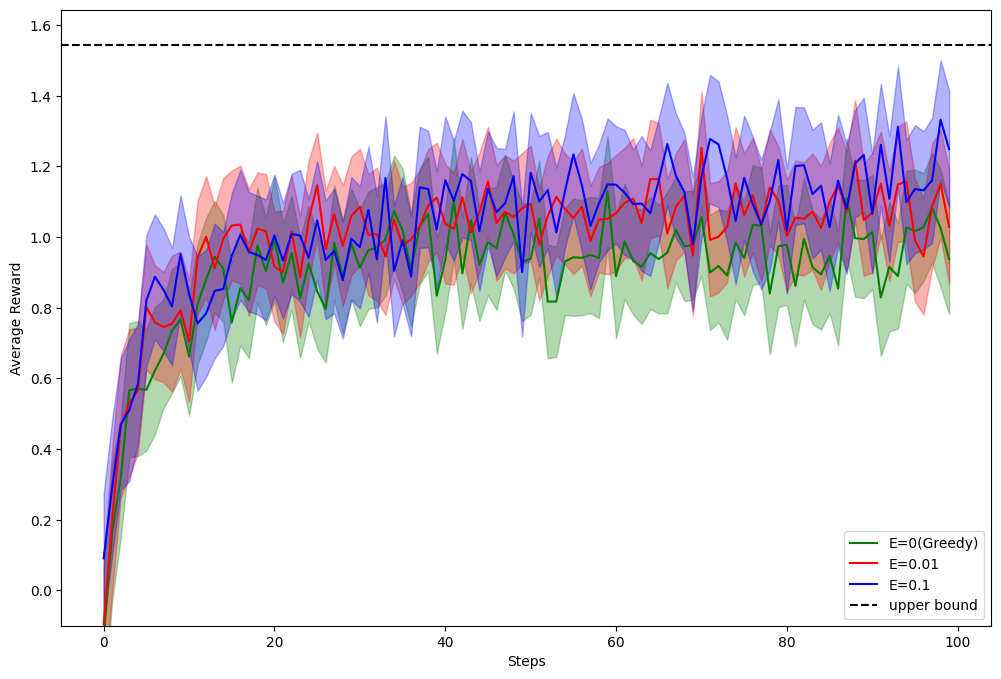

In [9]:
# Plot the "Average reward" figure
plot_curves([R1results_rewards, R2results_rewards, R3results_rewards],
            ["E=0(Greedy)", "E=0.01", "E=0.1"],
            ["Green", "Red", "Blue"],
            R1upper_bound,
            "Average Reward")

In [ ]:
# Plot the "% Optimal action" figure
plot_curves([R1results_action, R2results_action, R3results_action],
            ["E=0(Greedy)", "E=0.01", "E=0.1"],
            ["Green", "Red", "Blue"],
            np.ones((1,1)), # should be 100%
            "% Optimal Action")

# Q6: Implement the ε-greedy algorithm with optimistic initial values, and the bandit algorithm with UCB action selection

In [87]:
""" Reproducing the Figure 2.3.
Please note, instead of using the sample-average technique,
Use equation 2.5 to update the Q values with \alpha=0.1
"""
class EpsilonGreedyAgent(object):
    def __init__(self, k: int, init: int, epsilon: float) -> None:
        """Epsilon greedy bandit agent

        Args:
            k (int): number of arms
            init (init): initial value of Q-values
            epsilon (float): random action probability
        """
        # Number of the arms. For example, k = 10 for 10-armed Bandit problem
        self.k = k

        # Initial Q value
        self.init = init

        # Epsilon value
        self.epsilon = epsilon

        # Q-values for each arm
        self.Q = None
        # Number of times each arm was pulled
        self.N = None
        # Current total number of steps
        self.t = None

    def reset(self) -> None:
        """Initialize or reset Q-values and counts

        This method should be called after __init__() at least once
        """
        self.Q = self.init * np.ones(self.k, dtype=np.float32)
        self.N = np.zeros(self.k, dtype=int)
        self.t = 0

    def choose_action(self) -> int:
        """Choose which arm to pull

        With probability 1 - epsilon, choose the best action (break ties arbitrarily, use argmax() from above).
        
        With probability epsilon, choose a random action.
        """
        # CODE HERE: please implement the epsilon-greedy strategy to select the action
        noise = np.random.rand()
        if noise < self.epsilon:
            self.action = np.random.randint(self.k)
        else:
            self.action = self.argmax(self.Q)
        return self.action
        # return int

    def update(self, action: int, reward: float) -> None:
        """Update Q-values and N after observing reward.

        Args:
            action (int): index of pulled arm
            reward (float): reward obtained for pulling arm
        """
        # increase the time step
        self.t += 1
        
        # CODE HERE: implement the incremental update
        # update the self.N
        self.N[action] += 1
        
        # CODE HERE: update self.Q with the incremental update
        # Note: For reproducing Figure 2.3, implement the exponential average (equation 2.5)
        # Note: For reproducing Figure 2.4, implement the sample average (equation 2.1)
        self.Q[action] += 0.1 * (reward - self.Q[action]) # equation 2.5

    
    @staticmethod
    def argmax(arr) -> int:
        """Argmax that breaks ties randomly

        Takes in a list of values and returns the index of the item with the highest value, breaking ties randomly.

        Note: np.argmax returns the first index that matches the maximum, so we define this method to use in EpsilonGreedy and UCB agents.
        Args:
            arr: sequence of values
        """
        #CODE HERE: implement argmax_a Q(a) for the greedy action selection, breaking ties randomly.
        max_val = np.max(arr) 
        max_indices = np.where(arr == max_val)[0]
        if len(max_indices) > 1:
            return np.random.choice(max_indices)
        else:
            return max_indices[0]

In [88]:
""" Here is the implementation of the UCB agent. Please complete the missing part."""
class UCBAgent(object):
    def __init__(self, k: int, init: int, c: float) -> None:
        """Epsilon greedy bandit agent

        Args:
            k (int): number of arms
            init (init): initial value of Q-values
            c (float): UCB constant that controls degree of exploration
        """
        # Number of the arms. For example, k = 10 for 10-armed Bandit problem
        self.k = k

        # Initial Q value
        self.init = init

        # Epsilon value
        self.c = c

        # Q-values for each arm
        self.Q = None
        # Number of times each arm was pulled
        self.N = None
        # Current total number of steps
        self.t = None

    def reset(self) -> None:
        """Initialize or reset Q-values and counts

        This method should be called after __init__() at least once
        """
        self.Q = self.init * np.ones(self.k, dtype=np.float32)
        self.N = np.zeros(self.k, dtype=int)
        self.t = 0

    @staticmethod
    def argmax(arr) -> int:
        """Argmax that breaks ties randomly

        Takes in a list of values and returns the index of the item with the highest value, breaking ties randomly.

        Note: np.argmax returns the first index that matches the maximum, so we define this method to use in EpsilonGreedy and UCB agents.
        Args:
            arr: sequence of values
        """
        #CODE HERE: implement argmax_a Q(a) for the greedy action selection, breaking ties randomly.
        max_val = np.max(arr) 
        max_indices = np.where(arr == max_val)[0]
        if len(max_indices) > 1:
            return np.random.choice(max_indices)
        else:
            return max_indices[0]
        
    def choose_action(self):
        """Choose which arm to pull

        Use UCB action selection. Be sure to consider the case when N_t = 0 and break ties randomly (use argmax() from above)
        """
        # CODE HERE: use UCB to select the action. Be sure to consider the case when N_t = 0
        # and break ties randomly (use argmax() from above). The return should be an integer
        # index of the action.
        # return int
        if self.t < self.k:
            return self.t
        else:
            ucb = self.Q + self.c * np.sqrt(np.log(self.t) / self.N)
            return self.argmax(ucb)


    def update(self, action: int, reward: float) -> None:
        """Update Q-values and N after observing reward.

        Args:
            action (int): index of pulled arm
            reward (float): reward obtained for pulling arm
        """
        # increase the time step
        self.t += 1

        # CODE HERE: implement the incremental update
        # update the self.N
        self.N[action] += 1

        # CODE HERER: update self.
        # Note: For reproducing Figure 2.3, implement the exponential average (equation 2.5)
        # Note: For reproducing Figure 2.4, implement the sample average (equation 2.1)
        self.Q[action] += 0.1 * (reward - self.Q[action])


In [89]:
"""Here is the implementation of running the UCB agent. Please complete the missing part.
"""
# run epsilon greedy 
def run_ucb_agent(run_num, time_step, c):
    # create the 10-armed Bandit problem
    k = 10
    env = Bandit(k)
    env.reset()

    # create the agent
    my_agent = UCBAgent(k=k, init=0.0, c=c)
    my_agent.reset()

    # create a numpy array
    results_rewards = np.empty((run_num, time_step))
    
    # create a numpy array
    results_action = np.empty((run_num, time_step))

    # loop starts
    upper_bound = np.empty(run_num)
    for r in tqdm.tqdm(range(run_num), desc="run number", position=0):
       
        # CODE HERE: reset the environment and the agent
        # create a new 10-armed bandit problem
        env.reset()
        
        # CODE HERE: create a new agent
        my_agent.reset()

        # CODE HERE: update upper_bound[r]
        upper_bound[r] = np.max(env.q_star)

        for t in tqdm.tqdm(range(time_step), desc="time step", position=1, leave=False):
            # CODE HERE: choose action for time step t
            # act = int
            act = my_agent.choose_action()

            # CODE HERE: interact with the environment
            # reward = float
            reward = env.step(act)

            # CODE HERE: update the bandit agent with the observed reward
            my_agent.update(act, reward)

            
            # save the reward
            results_rewards[r, t] = reward
            # compute the optimality
            if act in env.best_action():
                results_action[r, t] = 1
            else:
                results_action[r, t] = 0
            
    return results_rewards, results_action, upper_bound

# Reproduce Figure 2.3 using exponential average (equation 2.5 with alpha = 0.1)

In [ ]:
"""Here is the implementation for running the experiment. You have to run the "run_ucb_agent" function
   for multiple times for different parameter combination. Please use smaller run_num and time_step for Debug only.
   For example, run_num = 100, time_step = 1000
"""
# set the running parameters
run_num = 2000
time_step = 1000
    
# CODE HERE: 
# 1. Run the epsilon-greedy agent experiment for initial value = 0.0, epsilon = 0.0
R1Reward, R1Action, R1upper = run_epsilon_greedy_agent(run_num, time_step, epsilon=0.0, init=0.0)
# 2. Run the epsilon-greedy agent experiment for initial value = 5.0, epsilon = 0.0 
R2Reward, R2Action, R2upper = run_epsilon_greedy_agent(run_num, time_step, epsilon=0.0, init=5.0)
# 3. Run the epsilon-greedy agent experiment for initial value = 0.0, epsilon = 0.1 
R3Reward, R3Action, R3upper = run_epsilon_greedy_agent(run_num, time_step, epsilon=0.1, init=0.0)
# 4. Run the epsilon-greedy agent experiment for initial value = 5.0, epsilon = 0.1 
R4Reward, R4Action, R4upper = run_epsilon_greedy_agent(run_num, time_step, epsilon=0.1, init=5.0)
# 5. Run the UCB agent experiment for c=2
R5Reward, R5Action, R5upper = run_ucb_agent(run_num, time_step, c=2.0)

In [ ]:
# Plot the "% Optimal action" figure
plot_curves([R1Action, R2Action, R3Action, R4Action, R5Action],
            ["Q1=0, E=0", "Q1=5, E=0", "Q1=0, E=0.1", "Q1=5, E=0.1", "UCB"],
            ["Green", "Red", "Blue", "Orange", "Purple"],
            np.ones((1,1)), # should be 100%
            "% Optimal Action")

# Reproduce Figure 2.4 using sample average (equation 2.1)

Setting Epsilon Greedy and UCB agent to equation 2.1

In [63]:
class EpsilonGreedyAgent(object):
    def __init__(self, k: int, init: int, epsilon: float) -> None:
        """Epsilon greedy bandit agent

        Args:
            k (int): number of arms
            init (init): initial value of Q-values
            epsilon (float): random action probability
        """
        # Number of the arms. For example, k = 10 for 10-armed Bandit problem
        self.k = k

        # Initial Q value
        self.init = init

        # Epsilon value
        self.epsilon = epsilon

        # Q-values for each arm
        self.Q = None
        # Number of times each arm was pulled
        self.N = None
        # Current total number of steps
        self.t = None

    def reset(self) -> None:
        """Initialize or reset Q-values and counts

        This method should be called after __init__() at least once
        """
        self.Q = self.init * np.ones(self.k, dtype=np.float32)
        self.N = np.zeros(self.k, dtype=int)
        self.t = 0

    def choose_action(self) -> int:
        """Choose which arm to pull

        With probability 1 - epsilon, choose the best action (break ties arbitrarily, use argmax() from above).
        
        With probability epsilon, choose a random action.
        """
        # CODE HERE: please implement the epsilon-greedy strategy to select the action
        noise = np.random.rand()
        if noise < self.epsilon:
            self.action = np.random.randint(self.k) # random action
        else:
            self.action = self.argmax(self.Q) # greedy action
        return self.action
        # return int 

    def update(self, action: int, reward: float) -> None:
        """Update Q-values and N after observing reward.

        Args:
            action (int): index of pulled arm
            reward (float): reward obtained for pulling arm
        """
        # increase the time step
        self.t += 1
        
        # CODE HERE: implement the incremental update
        # update the self.N
        self.N[action] += 1
        
        # CODE HERE: update self.Q with the incremental update
        # Note: please use the sample-average technique in equation 2.1
        self.Q[action] += 1/self.N[action] * (reward - self.Q[action])


    @staticmethod
    def argmax(arr) -> int:
        """Argmax that breaks ties randomly

        Takes in a list of values and returns the index of the item with the highest value, breaking ties randomly.

        Note: np.argmax returns the first index that matches the maximum, so we define this method to use in EpsilonGreedy and UCB agents.
        Args:
            arr: sequence of values
        """
        #CODE HERE: implement argmax_a Q(a) for the greedy action selection, breaking ties randomly.
        max_val = np.max(arr)
        max_indices = np.where(arr == max_val)[0]
        if len(max_indices) > 1:
            return np.random.choice(max_indices)
        else:
            return max_indices[0]
        # return int

In [64]:
""" Here is the implementation of the UCB agent. Please complete the missing part."""
class UCBAgent(object):
    def __init__(self, k: int, init: int, c: float) -> None:
        """Epsilon greedy bandit agent

        Args:
            k (int): number of arms
            init (init): initial value of Q-values
            c (float): UCB constant that controls degree of exploration
        """
        # Number of the arms. For example, k = 10 for 10-armed Bandit problem
        self.k = k

        # Initial Q value
        self.init = init

        # Epsilon value
        self.c = c

        # Q-values for each arm
        self.Q = None
        # Number of times each arm was pulled
        self.N = None
        # Current total number of steps
        self.t = None

    def reset(self) -> None:
        """Initialize or reset Q-values and counts

        This method should be called after __init__() at least once
        """
        self.Q = self.init * np.ones(self.k, dtype=np.float32)
        self.N = np.zeros(self.k, dtype=int)
        self.t = 0

    @staticmethod
    def argmax(arr) -> int:
        """Argmax that breaks ties randomly

        Takes in a list of values and returns the index of the item with the highest value, breaking ties randomly.

        Note: np.argmax returns the first index that matches the maximum, so we define this method to use in EpsilonGreedy and UCB agents.
        Args:
            arr: sequence of values
        """
        #CODE HERE: implement argmax_a Q(a) for the greedy action selection, breaking ties randomly.
        max_val = np.max(arr) 
        max_indices = np.where(arr == max_val)[0]
        if len(max_indices) > 1:
            return np.random.choice(max_indices)
        else:
            return max_indices[0]
        
    def choose_action(self):
        """Choose which arm to pull

        Use UCB action selection. Be sure to consider the case when N_t = 0 and break ties randomly (use argmax() from above)
        """
        # CODE HERE: use UCB to select the action. Be sure to consider the case when N_t = 0
        # and break ties randomly (use argmax() from above). The return should be an integer
        # index of the action.
        # return int
        if self.t < self.k: # if the number of steps is less than the number of arms
            return self.t # return the arm index
        else:
            ucb = self.Q + self.c * np.sqrt(np.log(self.t) / self.N)
            return self.argmax(ucb)


    def update(self, action: int, reward: float) -> None:
        """Update Q-values and N after observing reward.

        Args:
            action (int): index of pulled arm
            reward (float): reward obtained for pulling arm
        """
        # increase the time step
        self.t += 1

        # CODE HERE: implement the incremental update
        # update the self.N
        self.N[action] += 1

        # CODE HERER: update self.
        # Note: For reproducing Figure 2.3, implement the exponential average (equation 2.5)
        # Note: For reproducing Figure 2.4, implement the sample average (equation 2.1)
        self.Q[action] += 1/self.N[action] * (reward - self.Q[action])


In [ ]:
"""Here is the implementation for running the experiment. You have to run the "run_ucb_agent" function
   for multiple times for different parameter combination. Please use smaller run_num and time_step for Debug only.
   For example, run_num = 100, time_step = 1000
"""
# always set the random seed for results reproduction
np.random.seed(1234)
random.seed(1234)

# set the number of run
run_num = 2000
# set the number of time steps
time_step = 1000

# CODE HERE: 
# 1. Run the epsilon-greedy agent experiment for initial value = 0.0, epsilon = 0.0
R1results_rewards, R1results_action, R1upper_bound = run_epsilon_greedy_agent(run_num, time_step, epsilon=0.0, init=0.0)
# 2. Run the epsilon-greedy agent experiment for initial value = 5.0, epsilon = 0.0 
R2results_rewards, R2results_action, R2upper_bound = run_epsilon_greedy_agent(run_num, time_step, epsilon=0.0, init=5.0)
# 3. Run the epsilon-greedy agent experiment for initial value = 0.0, epsilon = 0.1 
R3results_rewards, R3results_action, R3upper_bound = run_epsilon_greedy_agent(run_num, time_step, epsilon=0.1, init=0.0)
# 4. Run the epsilon-greedy agent experiment for initial value = 5.0, epsilon = 0.1 
R4results_rewards, R4results_action, R4upper_bound = run_epsilon_greedy_agent(run_num, time_step, epsilon=0.1, init=5.0)
# 5. Run the UCB agent experiment for c=2
R5results_rewards, R5results_action, R5upper_bound = run_ucb_agent(run_num, time_step, c=2.0)

In [ ]:
# Plot the "Average reward" figure
plot_curves([R1results_rewards, R2results_rewards, R3results_rewards, R4results_rewards, R5results_rewards],
            ["Q1=0, E=0", "Q1=5, E=0", "Q1=0, E=0.1", "Q1=5, E=0.1", "UCB"],
            ["Green", "Red", "Blue", "Orange", "Purple"],
            R1upper_bound,
            "Average reward")

## Q7 Investigating nonstationary environments.

In [ ]:
def generate_bandits(arms = 10):
    # CODE HERE: Generate a k-armed bandit using the procedure described in Section 2.3
    

def generate_reward(bandits, arm):
    # CODE HERE: Generate a random reward using the specified arm of the bandit, 
    # with reward distribution as described in Section 2.3

    
def gen_argmax(l, return_all = False):
    # CODE HERE: Generalized argmax that finds all maximal elements and breaks ties 
    # If return_all is true, returns all maximal indices;
    # otherwise, tie is broken randomly and some element is returned

def plot_avg_se(data, num_se = 1.96, linestyle = 'k-'):
    means = []
    lowers = []
    uppers = []
    N = len(data)
    T = len(data[0])
    for t in range(T):
        data_t = [d[t] for d in data]
        mean = np.mean(data_t)
        se = np.std(data_t) / np.sqrt(N)
        means += [mean]
        lowers += [mean - num_se * se]
        uppers += [mean + num_se * se]
    h, = plt.plot(range(1,T+1), means, linestyle)
    plt.fill_between(range(1,T+1), lowers, uppers, color = linestyle[0], alpha = 0.2)
    return h


def q7(arms = 10, steps = 10000, trials = 2000, epsilon = 0.1, alpha = 0.1):
    rewards = [[] for _ in range(2)]
    optimals = [[] for _ in range(2)]
    upper_bound = []
    for trial in range(trials):
        if (trial + 1) % 10 == 0:
            print(trial + 1)
            
        # Initialize the bandit (all q* = 0)
        # Implement epsilon-greedy in the loop;
        # keep track of Q, N estimates and rewards, optimal actions, upper bounds
        # for both alpha = None and alpha = 0.1
        
        # CODE HERE: Initilization        

        
        # CODE HERE: LOOP        
        for t in range(steps):
            # Hint: you should determine best action at time t and its value, do the Epsilon-greedy action selection            
            # And explore both alpha = None and alpha = 0.1 at the same time 
            # Please use the variable name of: rs_none  rs_alpha to store the rewards and opts_none opts_alpha to store the optimal actions
            # and use upper to represent the upper bound value.
             
            
        # Store rewards and whether chosen actions were optimal
        rewards[0] += [rs_none]
        rewards[1] += [rs_alpha]
        optimals[0] += [opts_none]
        optimals[1] += [opts_alpha]
        upper_bound += [upper]


    # Plot average reward
    plt.figure()
    hs = []
    hs += [plot_avg_se(rewards[0], linestyle = 'b-')]
    hs += [plot_avg_se(rewards[1], linestyle = 'k-')]
    hs += [plot_avg_se(upper_bound, linestyle = 'k--')]
    plt.gca().set_xlim(0, steps)
    plt.gca().set_ylim(0, 2)
    plt.xlabel("Steps")
    plt.ylabel("Average reward")
    plt.legend(hs, ["Sample average", r"Exponential average, $\alpha = 0.1$", "Upper bound"])
    plt.show()


    # Plot proportion of time optimal action was chosen
    plt.figure()
    hs = []
    hs += [plot_avg_se(optimals[0], linestyle = 'b-')]
    hs += [plot_avg_se(optimals[1], linestyle = 'k-')]
    hs += [plt.hlines(1, 1, steps, linestyles = 'dashed')]
    plt.gca().set_xlim(0, steps)
    plt.gca().set_ylim(0, 1.05)
    plt.xlabel("Steps")
    plt.ylabel("Proportion optimal action")
    plt.legend(hs, ["Sample average", r"Exponential average, $\alpha = 0.1$", "Upper bound"])
    plt.show()

In [ ]:
q7(steps = 10000, trials = 2000)